In [18]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [19]:
# Set environment variables from the .env file
load_dotenv()

True

In [20]:
# Helper functions
def pretty_print_response(response):
    print(json.dumps(response, indent=4, sort_keys=True))

In [21]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET_KEY = os.getenv("PLAID_SBX_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [22]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [23]:
# Set the institution id
INSITUTION_ID = "ins_109508"

In [24]:
# Create and Print the public token
pub_token = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions','income','assets'])
pub_token

{'public_token': 'public-sandbox-2f20bdde-f417-4092-8ed6-47ad26c670ca',
 'request_id': 'W1F1iz68kgltbQ6'}

In [25]:
# Retrieve and print the access token
exchange_token = client.Item.public_token.exchange(pub_token['public_token'])
exchange_token

{'access_token': 'access-sandbox-6bb2d4be-a545-4d64-9737-41b88971cbb5',
 'item_id': 'mz9wnKWb97hEarvvpbLRC5yvlaKNdocL576n8',
 'request_id': 'KlMQqQ0DSEom32L'}

In [26]:
# Store the access token in a Python variable
access_token = exchange_token['access_token']

In [27]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'VegmD3org6fyeMqqQnaWub3v49q7Q7iWBrkQ3',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'w751mPDJ5wUG1lvvjQRau6EAQmaX4Xfrb89zn',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '5QVamlz6VRCRn8ddNkVvUmX4E9jxoxiZ1mVXB',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

In [28]:
# Set the start and end date 90 days from today
# Retrieve the transactions for the last 90 days
# Print the transactions

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions_response = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions_response)


[
    {
        "account_id": "JrbWDpd9b6HDr3yykM6oTBwEe8QxDxFdDPjMR",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-07-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

In [29]:
# Create a for-loop to print the categories for each transactionfor items in transaction_response:
transactions = transaction_response['transactions']
categories = []
for items in transactions:
    category = items['category']
    categories.append(category)

In [30]:
# Populate the transactions DataFrame with the transactions data
# Display sample data from the DataFrame    

column_names = ["Date", "Name", "Amount", "Category"]
df = pd.DataFrame(columns = column_names)

all_dates= []
for dates in transactions:
    col1 = dates['date']
    all_dates.append(col1)
df['Date']=all_dates


all_names= []
for names in transactions:
    col2 = names['name']
    all_names.append(col2)
df['Name']=all_names


all_amounts= []
for amount in transactions:
    col3 = amount['amount']
    all_amounts.append(col3)
df['Amount']=all_amounts


all_categories2 = []
for cat in transactions:
    category2 = cat['category'][0]
    all_categories2.append(category2)
df['Category']=all_categories2

df.head()

,Date,Name,Amount,Category
0,2020-07-29,United Airlines,500.00,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500.00,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-07-23,KFC,500.00,Food and Drink


In [31]:
df.dtypes

Date         object
Name         object
Amount      float64
Category     object
dtype: object

In [32]:
df = df.set_index("Date")

In [33]:
df.head()

,Name,Amount,Category
Date,,,
2020-07-29,United Airlines,500.00,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500.00,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-07-23,KFC,500.00,Food and Drink


In [34]:
#INCOME ANALYSIS
client.Accounts.get(access_token)
resp = client.Income.get(access_token)
resp

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': '5wE2l7pF7L4Xz3j'}

In [35]:
last_year= resp['income']['last_year_income_before_tax']
monthly_income = resp['income']['income_streams'][0]['monthly_income']
yearly_income = monthly_income * 12

print(f"Your last year's income was ${last_year}")
print(f"Your monthly income is ${monthly_income}")
print(f"Your projected yearly income is ${yearly_income}")

Your last year's income was $7285
Your monthly income is $500
Your projected yearly income is $6000


In [36]:
#Budget Analysis
expenses_by_category=df.groupby('Category').sum()["Amount"]
expenses_by_category

Category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel              535.19
Name: Amount, dtype: float64

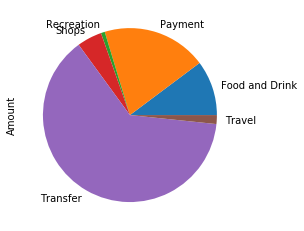

In [37]:
expenses_by_category.plot(kind='pie')

In [38]:
monthly_amount = df.reset_index()
monthly_amount["Month"] = pd.DatetimeIndex(monthly_amount["Date"]).month
monthly_amount = monthly_amount.groupby("Month").sum()

# Display sample data
monthly_amount

,Amount
Month,
4,500.00
5,10645.24
6,10645.24
7,10645.24


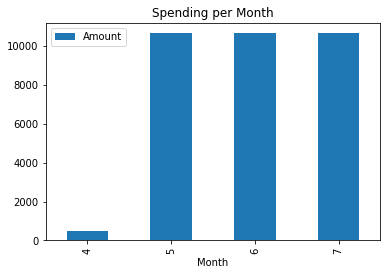

In [39]:
monthly_amount.plot(kind='bar', title='Spending per Month')